# Auto average planes

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Make all plots inline 
#%matplotlib inline

import postproengine as ppeng

In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
    
def formatTfig(fig,ax):
    ax.set_xlim([630000, 645000])
    return

def addturbines(fig, ax):
    outputcsv = '//lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/turbines_farmrun.csv'
    # Process the csv file
    df = pd.read_csv(outputcsv)
    # Fix the turbine types of the turbines
    for index, row in df.iterrows():
        ax.plot(row[' x'], row[' y'], 's', color='k', markersize=1)
    #ax.set_xlim([630000, 645000])
    return

#ppeng.formatTfig = formatTfig
#ppeng.addturbines = addturbines

In [3]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - averageworkflow

averageworkflow:
  avgplanes:
#  - name: coarse XY plane
#    ncfile: 
#    - /lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z153hh_?8000.nc 
#    varnames: [ 'velocityx', 'velocityy', 'velocityz']   
#    savepklfile: savepkl/avg_xy_hubheight
"""
fhh = io.StringIO(yamlstring)
yamldicthh = Loader(fhh, **loaderkwargs)

In [4]:
pkldir='/lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/savepkl'

In [5]:
yamldicthh['averageworkflow']['avgplanes'] = []
for zs in ['090', '153']:
    for t in [24300, 24900, 25500, 26100, 26700, 27300]:
        print(zs,t)
        avgdict = {
            'name': 'coarse XY plane',
            'ncfile': [f'/lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z{zs}hh_?8000.nc'],
            'varnames': ['velocityx', 'velocityy', 'velocityz', 'temperature'],
            'tavg':[t, t+600],       
            'savepklfile': '%s/avg_xy_hubheight/KP_z%s_hh_%i.pkl'%(pkldir,zs,t)}
        yamldicthh['averageworkflow']['avgplanes'].append(avgdict)

090 24300
090 24900
090 25500
090 26100
090 26700
090 27300
153 24300
153 24900
153 25500
153 26100
153 26700
153 27300


In [6]:
# Run the driver
ppeng.driver(yamldicthh, verbose=True)

Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z090hh_48000.nc 600
Getting data from ncfile:  /lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z090hh_48000.nc
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z090hh_68000.nc 0
Getting data from ncfile:  /lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z090hh_68000.nc

Ncount = 600

/lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z090hh_48000.nc 600
Getting data from ncfile:  /lustre/orion/cfd162/world-shared/lcheung/AWAKEN.cli187/Benchmark1/Phase1/BM1_FarmRunProd1.summit/post_processing/KP_z

## Plot the result

In [7]:
def loadpickle(picklefile):
    pfile          = open(picklefile, 'rb')
    ds             = pickle.load(pfile)
    pfile.close()
    return ds

In [8]:
ds = loadpickle(pkldir+'/avg_xy_hubheight/KP_z%s_hh_%i.pkl'%('090', 26700))

Text(0.5, 1.0, 'AVG horizontal velocity')

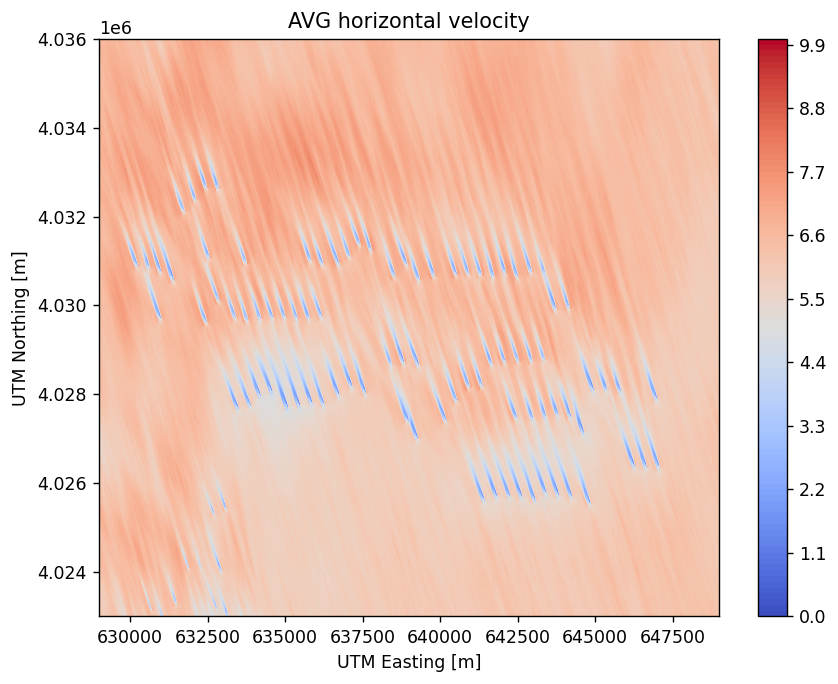

In [9]:
plt.figure(figsize=(8,6),dpi=125)
plt.contourf(ds['x'][0,:,:], ds['y'][0,:,:], np.sqrt(ds['velocityx_avg'][0,:,:]**2 +ds['velocityy_avg'][0,:,:]**2) , 
             levels=np.linspace(0,10,101),
            cmap='coolwarm')
plt.colorbar()
plt.xlabel('UTM Easting [m]')
plt.ylabel('UTM Northing [m]')
plt.title('AVG horizontal velocity')